### ➰ 목표

: 축구 21-22시즌 프리미어리그 선수들의 스탯을 나타내는 데이터 파일을 분석하여 각 팀에 대한 스탯을 담은 데이터프레임을 생성해 최종 승점을 내고 실제 21-22시즌의 승점 순위와 얼마나 차이가 나는 가를 비교 분석하고자 합니다.
<br><br>

### ➰ 각 팀에 대한 스탯을 담은 데이터프레임 내 컬럼 종류
: 승점을 내기 위해 승점을 판단할 수 있는 6가지 요소를 컬럼으로 지정해 데이터 프레임을 생성하고자 합니다.<br>

1. (공격수 + 미드필더)의 팀별 평균 득점률
2. (공격수 + 미드필더)의 나이에 따른 평균 득점률
3. (공격수 + 미드필더) 국적에 따른 평균 득점률
4. 선수의 평균 지구력
5. 경고 카드 평균 누적량
6. (실제 골 - 예상 골) 평균 수치
<br><br>

### ➰ 분석과정
- 데이터 전처리하기
- 팀 스탯 데이터 프레임에 추가할 컬럼 생성
- 승점 데이터프레임 생성
- 실제 승점과 비교분석하기





---



### ⚽ 데이터 전처리하기

- 프로젝트를 진행하기 위해 필요한 라이브러리

In [102]:
import chardet # csv파일 인코딩 확인하기 위한 라이브러리

import pandas as pd # 데이터프레임 생성을 위한 라이브러리
import missingno as msno # 결측치 확인을 위한 라이브러리

# 시각화를 위한 라이브러리
import seaborn as sns 
import matplotlib.pyplot as plt

# 코드 실행시 발생하는 경고를 무시하기 위함
import warnings
warnings.filterwarnings('ignore')

- 데이터 가져오기
: 오류 발생, 오류 해결


In [103]:
try :
    premier_league = pd.read_csv("/content/drive/MyDrive/data/Football Players Stats (Premier League 2021-2022).csv")
    print(premier_league)
except Exception as e: # 파일을 열었을 때 발생한 에러 출력
    print(f'에러 : {e}')

에러 : 'utf-8' codec can't decode byte 0xa0 in position 169: invalid start byte


In [104]:
with open("/content/drive/MyDrive/data/Football Players Stats (Premier League 2021-2022).csv", 'rb')as f:
    text = f.read()

result = chardet.detect(text) # csv파일 내 정보 출력
print(result)
enc = result['encoding'] # encoding에 해당하는 부분을 출력했더니 
print(enc) # Windows-1252임을 확인할 수 있음

{'encoding': 'Windows-1252', 'confidence': 0.7294279210359369, 'language': ''}
Windows-1252


- 데이터 가져오기

In [105]:
premier_league = pd.read_csv("/content/drive/MyDrive/data/Football Players Stats (Premier League 2021-2022).csv", encoding="Windows-1252")
# pandas를 이용하여 데이터 호출하기

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# 데이터가 잘리는 것 없이 확인하기 위함

print(premier_league.shape) # 총 30개의 컬럼을 가진 691개의 데이터 확인 가능
premier_league.head() # 데이터 확인

(691, 30)


,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,7.0,9.0,2.0,2.0,6.0,0.0,0.33,0.21,0.54,0.27,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,0.0,5.0,0.0,0.0,8.0,1.0,0.15,0.00,0.15,0.15,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,4.0,7.0,0.0,0.0,4.0,0.0,0.23,0.13,0.36,0.23,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38


- 데이터 프레임 내의 컬럼 설명



||||데이터 컬럼 설명||||
|---|---|---|---|---|---|---|
|Player|플레이어의 이름|Team|2021-2020년에 활약한 클럽|Nation|플레이어의 국가|
|Pos|포지션|Age|플레이어의 나이|MP|플레이한 경기|
|starts|경기 시작|Min|재생 시간|90s|플레이 시간을 90으로 나눈 값|
|Gls|득점 또는 허용된 골|AST|어시스트|G-PK|무승부 골|
|PK|페널티킥|PKatt|승부차기 참가|CrdY|옐로우 카드|
|CrdR|레드 카드|Gls|90분당 득점|Ast|90분당 어시스트|
|G+A|90분당 골 및 어시스트|G-PK|90분당 득점에서 페널티킥을 뺀 횟수|G+A-PK|90분당 득점 + 어시스트 - 페널티 킥|
|xG|예상 골|npxG|페널티 없는 예상 골|xA|예상 지원
|npxG+xA|페널티 없는 예상 골 + 예상 어시스트|xG|90분당 예상 골|npxG|90분당 페널티 없는 예상 골|
|xA|90분당 예상 어시스트|npxG+xA|페널티 없는 예상 골 + 90분당 예상 어시스트

- 사용할 컬럼만을 따로 담은 데이터 프레임 생성

In [106]:
R_PL = premier_league[["Team",	"Nation",	"Pos", "Age", "MP",	"Min",	"Gls",	"CrdY",	"CrdR",	"xG"]] # 사용할 컬럼만 따로 저장한 데이터프레임 생성
R_PL.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG
0,Arsenal,eng ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7
1,Arsenal,br BRA,DF,23.0,35,"3,063",5.0,8.0,1.0,2.7
2,Arsenal,eng ENG,GK,23.0,34,"3,060",0.0,1.0,0.0,0.0
3,Arsenal,eng ENG,DF,23.0,32,"2,880",0.0,3.0,0.0,1.0
4,Arsenal,no NOR,MF,22.0,36,"2,785",7.0,4.0,0.0,4.8


- 결측치 확인

column:       Team	 Percent of NaN value:0.00%
column:     Nation	 Percent of NaN value:0.43%
column:        Pos	 Percent of NaN value:0.00%
column:        Age	 Percent of NaN value:0.58%
column:         MP	 Percent of NaN value:0.00%
column:        Min	 Percent of NaN value:20.98%
column:        Gls	 Percent of NaN value:20.84%
column:       CrdY	 Percent of NaN value:20.84%
column:       CrdR	 Percent of NaN value:20.84%
column:         xG	 Percent of NaN value:20.98%


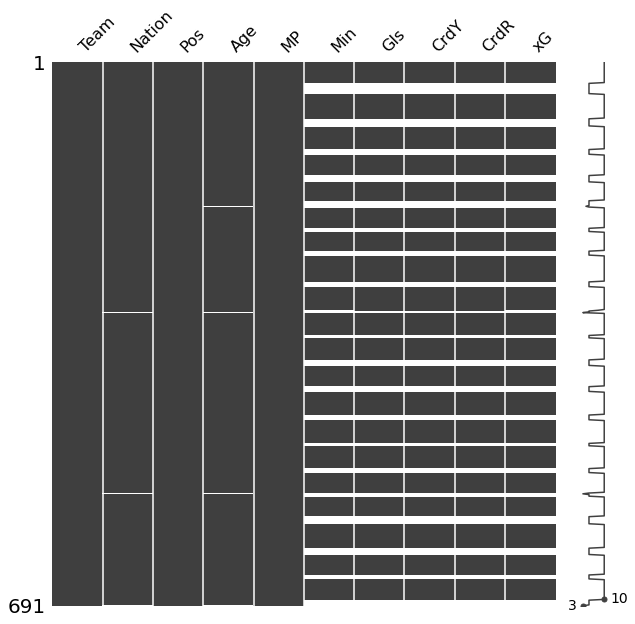

In [107]:
for col in R_PL.columns:
  msg = 'column: {:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100 * (premier_league[col].isnull().sum() / premier_league[col].shape[0]))
  # isnull함수를 통해 결측치 비율 확인
  
  print(msg)

msno.matrix(df = R_PL.iloc[:, :], figsize=(10, 10))
# missingno 라이브러리를 통한 결측치 시각화

- 결측치 제거

In [108]:
# 컬럼 min이 결측치에 해당하는 경우 행 제거

print(f'결측치 제거 전 행 수 : {len(R_PL)}')

not_a_number =  R_PL[R_PL["Min"].isnull()==True].index  # 결측치에 해당하는 인덱스 추출

R_PL.drop(not_a_number, inplace=True) # 결측치에 해당하는 행 제거
R_PL.reset_index(drop=True, inplace=True) # 인덱스 정렬

print(f'결측치 제거 후 행 수 : {len(R_PL)}')

R_PL.head() # 데이터 확인


결측치 제거 전 행 수 : 691
결측치 제거 후 행 수 : 546


,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG
0,Arsenal,eng ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7
1,Arsenal,br BRA,DF,23.0,35,"3,063",5.0,8.0,1.0,2.7
2,Arsenal,eng ENG,GK,23.0,34,"3,060",0.0,1.0,0.0,0.0
3,Arsenal,eng ENG,DF,23.0,32,"2,880",0.0,3.0,0.0,1.0
4,Arsenal,no NOR,MF,22.0,36,"2,785",7.0,4.0,0.0,4.8


- 추후 국가별 평균 득점률을 내기 위한 Nation컬럼 전처리
<br>
: 국가를 나타내는 맨 뒤의 대문자만 남기고 제거


In [109]:
R_PL['Nation'][0] # Nation 데이터 확인

'eng\xa0ENG'

In [110]:
# 국가 컬럼 전처리
nation = R_PL['Nation'].copy()

for i in range(len(nation)):
    nation[i] = nation[i][-3:]
    # nation 컬럼 데이터 내의 국가를 나타내는 맨 뒤의 대문자만 따로 추출

R_PL['Nation'] = nation # R_PL 데이터 프레임 nation에 덮어씌우기

R_PL.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG
0,Arsenal,ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7
1,Arsenal,BRA,DF,23.0,35,"3,063",5.0,8.0,1.0,2.7
2,Arsenal,ENG,GK,23.0,34,"3,060",0.0,1.0,0.0,0.0
3,Arsenal,ENG,DF,23.0,32,"2,880",0.0,3.0,0.0,1.0
4,Arsenal,NOR,MF,22.0,36,"2,785",7.0,4.0,0.0,4.8


- 전처리가 완료된 데이터 프레임을 새로운 CSV로 변환하기

In [111]:
R_PL.to_csv("/content/drive/MyDrive/data/R_PL", index=False) # 데이터프레임 csv로 변환

FB_DF = pd.read_csv("/content/drive/MyDrive/data/R_PL") # 데이터 프레임 호출

### ⚽ 팀 스탯 데이터 프레임에 추가할 컬럼 생성



#####⭐(공격수 + 미드필더)의 팀별 평균 득점률


#####⭐(공격수 + 미드필더)의 나이에 따른 평균 득점률

step1. 주 득점원은 공격과 미드필더라고 판단하고 수비와 골키퍼는 해당 데이터에서 제외하기

In [112]:
fm = FB_DF.copy() # 데이터 프레임 copy
print(f'수비수 골키퍼 제외 전 : {len(fm)}')

# 수비수, 골키퍼 제외
dg = fm[(fm['Pos']=='DF')|(fm['Pos']=='GK')].index
fm.drop(dg,inplace = True)
print(f'수비수 골키퍼 제외 후 : {len(fm)}')

수비수 골키퍼 제외 전 : 546
수비수 골키퍼 제외 후 : 319


step2. Gls컬럼과 Age컬럼을 통해 나이별 득점 분포를 알아보고 나이별 평균 득점율 구하기<br>
: (총 득점율/나이가 같은 선수 수)

In [113]:
ages = list(set((fm['Age']))) # 나이 중복 제거

gls_rate = {} # 비어있는 딕셔너리 생성

for i in range(len(ages)):
    age_per_gls =round(fm[fm['Age'] == ages[i]]['Gls'].sum()/len(fm[fm['Age'] == ages[i]]),2)
    gls_rate[ages[i]] = age_per_gls
    # gls_rate 딕셔너리 내에 나이에 따른 평균 득점 수 할당

print(f'나이별 평균 골수 : {gls_rate}') # 나이별 평균 골수


나이별 평균 골수 : {16.0: 0.0, 17.0: 0.0, 18.0: 0.0, 19.0: 1.68, 20.0: 1.19, 21.0: 2.4, 22.0: 2.75, 23.0: 2.13, 24.0: 5.1, 25.0: 2.7, 26.0: 3.45, 27.0: 1.31, 28.0: 4.18, 29.0: 5.32, 30.0: 3.63, 31.0: 2.21, 32.0: 1.17, 33.0: 0.0, 34.0: 3.43, 35.0: 0.0, 36.0: 6.67}


In [114]:
dict_ = {}
dict_['Age'] = [i for i in gls_rate.keys()]
dict_['GPA'] = [i  for i in gls_rate.values()]
# 비어 있는 딕셔너리에 Age와 GPA key 내에 나이별 평균 골수 대한 key, value 할당

age_per_gls = pd.DataFrame(dict_)
age_per_gls.head() # 나이별 평균 골수 데이터 프레임

,Age,GPA
0,16.0,0.00
1,17.0,0.00
2,18.0,0.00
3,19.0,1.68
4,20.0,1.19


In [115]:
fm = pd.merge(fm,age_per_gls,how='inner', on='Age') 
# merge를 사용하여 원래 데이터 프레임에 합치기
fm[['Age','GPA']].head() # 나이별 평균 골이 잘 출력 됨

,Age,GPA
0,19.0,1.68
1,19.0,1.68
2,19.0,1.68
3,19.0,1.68
4,19.0,1.68


In [116]:
fm.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,GPA
0,Arsenal,ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7,1.68
1,Aston Villa,ENG,"MF,FW",19.0,3,27,0.0,0.0,0.0,0.0,1.68
2,Aston Villa,ENG,FW,19.0,1,5,0.0,0.0,0.0,0.0,1.68
3,Brighton & Hove Albion,ECU,MF,19.0,8,660,1.0,2.0,0.0,0.8,1.68
4,Brighton & Hove Albion,ECU,"FW,MF",19.0,5,48,0.0,0.0,0.0,0.0,1.68


step3. 팀별 나이를 조사하고 알아낸 나이별 득점율을 통해 팀별 나이에 따른 득점율((나이가 같은 인원* 나이에 따른 득점율)의 합/팀 인원 수) 계산하여 데이터프레임 만들기


In [117]:
team =list(set(fm['Team'])) #팀 리스트

gls_per_team = {}
for i in team:
    gls_per_team[i] = (round(fm[fm['Team']==i]['GPA'].sum()/len(fm[fm['Team']==i]),2))
    # 팀의 나이에 따른 득점율 = 팀별 평균골수의 합/팀 인원수

print(f'팀별 나이 분포에 따른 평균 득점율 : {gls_per_team}')

dict_ = {}
dict_['Team'] = [i for i in gls_per_team.keys()]
dict_['Age_of_Gls'] = [i  for i in gls_per_team.values()]
# 데이터 프레임 형태로 만들기 위해 딕셔너리 내에 gls_rate의 key, value값 할당하기

팀별 나이 분포에 따른 평균 득점율 : {'Manchester City': 2.76, 'Norwich City': 2.23, 'West Ham United': 2.57, 'Brighton & Hove Albion': 2.34, 'Brentford': 2.42, 'Watford': 2.46, 'Aston Villa': 2.95, 'Wolverhampton Wanderers': 2.62, 'Everton': 2.73, 'Manchester United': 2.64, 'Crystal Palace': 3.01, 'Burnley': 3.08, 'Tottenham Hotspur': 2.97, 'Newcastle United': 3.66, 'Southampton': 3.07, 'Chelsea': 2.94, 'Arsenal': 2.72, 'Liverpool': 2.72, 'Leicester City': 3.32, 'Leeds United': 2.45}


In [118]:
team_A = pd.DataFrame(dict_)  # 나이별 평균 골수 컬럼을 추가한 팀 스탯 데이터 프레임 생성
team_A.head() # 데이터 확인

,Team,Age_of_Gls
0,Manchester City,2.76
1,Norwich City,2.23
2,West Ham United,2.57
3,Brighton & Hove Albion,2.34
4,Brentford,2.42



#####⭐(공격수 + 미드필더) 국적에 따른 평균 득점률


step1. Gls컬럼과 Age컬럼을 통해 국가별 득점 분포를 알아보고 국가별 평균 득점율 구하기 <br>
: (총 득점율/국가가 같은 선수 수)

- 주 득점원은 공격과 미드필더라고 판단하고 앞서 수비와 골키퍼가 제외된 fm 데이터프레임 사용

In [119]:
nations = list(set((fm['Nation']))) # 국가 중복 제거

gls_rate = {}

for i in range(len(nations)):
    Nation_per_gls =round(fm[fm['Nation'] == nations[i]]['Gls'].sum()/len(fm[fm['Nation'] == nations[i]]),2)
    gls_rate[nations[i]] = Nation_per_gls
    # gls_rate 국가별 평균 골수를 할당함(총 득점율/국가가 같은 선수 수)
    
print(f'국가별 평균 골수 :{gls_rate}') # 국가 별 평균 골수

dict_ = {}
dict_['Nation'] = [i for i in gls_rate.keys()]
dict_['GPA_N'] = [i  for i in gls_rate.values()]
# 데이터 프레임 형태로 만들기 위해 딕셔너리 내에 gls_rate의 key, value값 할당하기

국가별 평균 골수 :{'IRN': 1.0, 'UKR': 1.0, 'NED': 0.89, 'POL': 0.33, 'MAR': 2.0, 'DEN': 1.0, 'ITA': 3.0, 'NIR': 0.5, 'ENG': 2.34, 'ESP': 2.25, 'SEN': 5.25, 'CRO': 1.5, 'KVX': 1.0, 'MLI': 1.0, 'GER': 3.71, 'SVK': 1.0, 'COD': 2.67, 'ECU': 0.5, 'ALB': 6.0, 'PAR': 1.0, 'ZIM': 0.0, 'TUN': 0.0, 'JPN': 3.0, 'POR': 5.17, 'GRE': 0.0, 'ISL': 0.0, 'GHA': 3.0, 'BEL': 5.75, 'NGA': 2.75, 'SWE': 2.33, 'NOR': 4.25, 'ANG': 0.0, 'NZL': 2.5, 'USA': 4.0, 'ZAM': 3.5, 'GRN': 1.0, 'JAM': 5.5, 'TUR': 0.0, 'COL': 3.0, 'MEX': 6.0, 'WAL': 1.25, 'ALG': 9.5, 'CZE': 2.33, 'GAB': 4.0, 'SCO': 1.6, 'ARG': 3.5, 'GUI': 3.0, 'SRB': 0.0, 'SUI': 1.0, 'BRA': 4.24, 'URU': 1.0, 'KOR': 14.0, 'FRA': 2.62, 'IRL': 0.5, 'VEN': 1.0, 'BFA': 0.0, 'CIV': 6.0, 'EGY': 7.67, 'FIN': 5.5}


In [120]:
Nation_per_gls = pd.DataFrame(dict_)
Nation_per_gls.head() # 나이별 평균 골수 데이터 프레임

fm = pd.merge(fm,Nation_per_gls,how='inner', on='Nation')
fm[['Nation','GPA_N']].head() # 데이터 확인

,Nation,GPA_N
0,ENG,2.34
1,ENG,2.34
2,ENG,2.34
3,ENG,2.34
4,ENG,2.34


In [121]:
fm.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,GPA,GPA_N
0,Arsenal,ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7,1.68,2.34
1,Aston Villa,ENG,"MF,FW",19.0,3,27,0.0,0.0,0.0,0.0,1.68,2.34
2,Aston Villa,ENG,FW,19.0,1,5,0.0,0.0,0.0,0.0,1.68,2.34
3,Leeds United,ENG,"FW,MF",19.0,20,746,2.0,4.0,0.0,3.1,1.68,2.34
4,Leeds United,ENG,"MF,FW",19.0,7,237,0.0,0.0,0.0,0.4,1.68,2.34


step2. 팀별 국가를 조사하고 알아낸 국가별 득점율을 통해 팀별 국가에 따른 득점율((국가가 같은 인원* 국가에 따른 득점율)의 합/팀 인원 수) 계산하여 데이터프레임 만들기

In [122]:
team =list(set(fm['Team'])) #팀 리스트

gls_per_team = {}

for i in team:
    gls_per_team[i] = (round(fm[fm['Team']==i]['GPA_N'].sum()/len(fm[fm['Team']==i]),2))
    # 팀의 국가에 따른 득점율 = 팀별 평균골수의 합/팀 인원수

print(gls_per_team)

{'Manchester City': 3.69, 'Norwich City': 2.22, 'West Ham United': 3.02, 'Brighton & Hove Albion': 2.11, 'Brentford': 2.16, 'Watford': 2.65, 'Aston Villa': 2.78, 'Wolverhampton Wanderers': 5.01, 'Everton': 2.41, 'Manchester United': 2.27, 'Tottenham Hotspur': 3.11, 'Burnley': 2.34, 'Crystal Palace': 2.85, 'Newcastle United': 2.36, 'Southampton': 2.29, 'Chelsea': 2.92, 'Arsenal': 3.5, 'Liverpool': 3.53, 'Leicester City': 2.9, 'Leeds United': 1.91}


In [123]:
dict_ = {}
dict_['Team'] = [i for i in gls_per_team.keys()]
dict_['Nation_of_Gls'] = [i  for i in gls_per_team.values()]


team_N = pd.DataFrame(dict_)
# teamrank.head() # 국가별 평균 골수 데이터 프레임

team_N = pd.merge(team_A,team_N, how = 'inner', on= 'Team')
team_N.head()

,Team,Age_of_Gls,Nation_of_Gls
0,Manchester City,2.76,3.69
1,Norwich City,2.23,2.22
2,West Ham United,2.57,3.02
3,Brighton & Hove Albion,2.34,2.11
4,Brentford,2.42,2.16


#####⭐선수의 평균 지구력


# 나이컬럼 -> 출정 시간 + 출정횟수 => 지구력 판단 출정시간 / 출정횟수
step1. 나이에 따른 지구력을 구하기 위해

In [124]:
# print(len(FB_DF))

# FB_DF["Age"] = FB_DF["Age"].astype(int)
# print(FB_DF["Age"].min(),FB_DF["Age"].max())
# # 제일 어린 선수 16살, 제일 나이가 많은 선수 39살

In [125]:
# 전체 나이별 분포도
FB_DF["Min"] = FB_DF["Min"].str.replace(",", "")
# 문자열 하나하나 쪼개서 특정문자열 발견되면 치환해주기

FB_DF["Min"] = FB_DF["Min"].astype(int)

FB_DF["endurance"] = round(FB_DF["Min"] / FB_DF["MP"], 3)
# 타입이 맞지 않는 에러 발생 PB_DF["Min"][0] : str, PB_DF["MP"][0]: int

FB_DF.head()

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,endurance
0,Arsenal,ENG,"FW,MF",19.0,38,2978,11.0,6.0,0.0,9.7,78.368
1,Arsenal,BRA,DF,23.0,35,3063,5.0,8.0,1.0,2.7,87.514
2,Arsenal,ENG,GK,23.0,34,3060,0.0,1.0,0.0,0.0,90.000
3,Arsenal,ENG,DF,23.0,32,2880,0.0,3.0,0.0,1.0,90.000
4,Arsenal,NOR,MF,22.0,36,2785,7.0,4.0,0.0,4.8,77.361


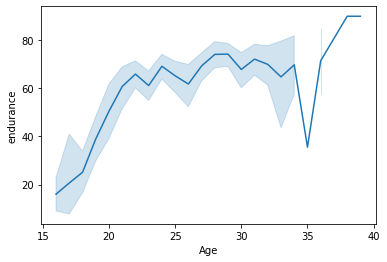

      Team Nation    Pos   Age  MP   Min   Gls  CrdY  CrdR   xG  endurance
0  Arsenal    ENG  FW,MF  19.0  38  2978  11.0   6.0   0.0  9.7     78.368
1  Arsenal    BRA     DF  23.0  35  3063   5.0   8.0   1.0  2.7     87.514
3  Arsenal    ENG     DF  23.0  32  2880   0.0   3.0   0.0  1.0     90.000
4  Arsenal    NOR     MF  22.0  36  2785   7.0   4.0   0.0  4.8     77.361
5  Arsenal    SUI  MF,DF  28.0  27  2327   1.0  10.0   1.0  1.2     86.185


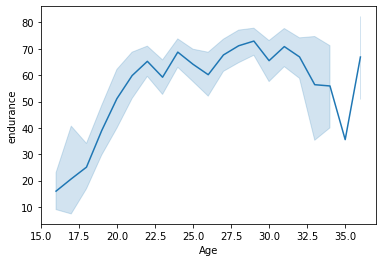

In [126]:
# 팀별로 공격수 평균 연령 총 득점
# 팀별 득점 분포 -> 몇 명이서 득점햇는가


# sns.distplot(x=PB_DF["Age"], y=PB_DF["endurance"])

sns.lineplot(data=FB_DF, x="Age", y="endurance")
plt.show()
# 출력을 해보니 나이가 많은데 지구력이 높은 사람들이 많아 따로 뽑아서 확인해보니 골키퍼는 경기를 계속 뛰었기 때문에 min이 긴 것을 확인할 수 있음
# 골키퍼를 제외하고 분포를 확인

GK = FB_DF[FB_DF["Pos"] == "GK"].index

R_FB_DF = FB_DF.drop(GK)
print(R_FB_DF.head())

sns.lineplot(data=R_FB_DF, x="Age", y="endurance") # 중앙값일듯 boxplot 사용해도 ㄱㅊㄱㅊ
plt.show()
# 최종 팀별 경기 출전횟수 * 지구력 / 팀원 수 => 그 팀의 평균 지구력을 볼 수 있음

# 국가별 



In [127]:
# 팀 별 골키퍼가 제외된 포지션 수 
# 팀 별 평균 지구력
# 전체 지구력 / (팀원 수 구하고 - 팀원에서 골키퍼 포지션 수 )
# 지구력에 해당하는 컬럼 다 더하기


Team = {}

for i in R_FB_DF["Team"]:
    if i in Team:
      Team[i] += 1
    else:
      Team[i] = 1

print(Team)
print(sum(Team.values()))

print(R_FB_DF.head())

# 20세 초에 정도에 경험이 쌓이면서 26~27 전성기, 30대 하락 -> //////// 전성기 : 지구력으로 봐도 될 듯 ?
# 0.25 ~ 이런식으로 나누기
# 
# 용불슈ㅐ수 ? (나라)

print(len(R_FB_DF))

{'Arsenal': 25, 'Aston Villa': 28, 'Brentford': 26, 'Brighton & Hove Albion': 24, 'Burnley': 21, 'Chelsea': 24, 'Crystal Palace': 22, 'Everton': 31, 'Leeds United': 27, 'Leicester City': 26, 'Liverpool': 25, 'Manchester City': 24, 'Manchester United': 28, 'Newcastle United': 26, 'Norwich City': 26, 'Southampton': 22, 'Tottenham Hotspur': 24, 'Watford': 28, 'West Ham United': 23, 'Wolverhampton Wanderers': 24}
504
      Team Nation    Pos   Age  MP   Min   Gls  CrdY  CrdR   xG  endurance
0  Arsenal    ENG  FW,MF  19.0  38  2978  11.0   6.0   0.0  9.7     78.368
1  Arsenal    BRA     DF  23.0  35  3063   5.0   8.0   1.0  2.7     87.514
3  Arsenal    ENG     DF  23.0  32  2880   0.0   3.0   0.0  1.0     90.000
4  Arsenal    NOR     MF  22.0  36  2785   7.0   4.0   0.0  4.8     77.361
5  Arsenal    SUI  MF,DF  28.0  27  2327   1.0  10.0   1.0  1.2     86.185
504


In [128]:
Team_en = {}

print(Team)

R_FB_DF[R_FB_DF["Team"] == "Arsenal"]["endurance"].sum() # 숫자 나옴

for i, j in enumerate(R_FB_DF["Team"]):
  if j in Team_en:
    Team_en[j] += R_FB_DF.iloc[i]["endurance"]
  else:
    Team_en[j] = R_FB_DF.iloc[i]["endurance"]

print(Team_en)

for i in Team_en.keys():
    Team_en[i] = round(Team_en[i]/Team[i], 3)

print(Team_en)


{'Arsenal': 25, 'Aston Villa': 28, 'Brentford': 26, 'Brighton & Hove Albion': 24, 'Burnley': 21, 'Chelsea': 24, 'Crystal Palace': 22, 'Everton': 31, 'Leeds United': 27, 'Leicester City': 26, 'Liverpool': 25, 'Manchester City': 24, 'Manchester United': 28, 'Newcastle United': 26, 'Norwich City': 26, 'Southampton': 22, 'Tottenham Hotspur': 24, 'Watford': 28, 'West Ham United': 23, 'Wolverhampton Wanderers': 24}
{'Arsenal': 1608.1129999999998, 'Aston Villa': 1475.1119999999996, 'Brentford': 1495.771, 'Brighton & Hove Albion': 1437.6009999999999, 'Burnley': 1459.7510000000004, 'Chelsea': 1541.0520000000004, 'Crystal Palace': 1384.828, 'Everton': 1730.699, 'Leeds United': 1560.9209999999998, 'Leicester City': 1694.269, 'Liverpool': 1456.4169999999997, 'Manchester City': 1480.0610000000004, 'Manchester United': 1624.063, 'Newcastle United': 1749.624, 'Norwich City': 1630.0360000000003, 'Southampton': 1417.3480000000002, 'Tottenham Hotspur': 1475.293, 'Watford': 1792.2030000000004, 'West Ham 

In [129]:
Team_R = pd.read_csv("/content/drive/MyDrive/data/TeamRank.csv")


del Team_R["Unnamed: 0"]


Team_R = pd.read_csv("/content/drive/MyDrive/data/TeamRank.csv")

del Team_R["Unnamed: 0"]

Team_en_ = pd.DataFrame()

Team_en_["Team"] = Team_en.keys()
Team_en_["Team_en"] = Team_en.values()

Team_R = pd.merge(Team_R, Team_en_, on = 'Team')

Team_R

,Team,Gls_Per_Team,Team_en
0,Manchester City,2.76,61.669
1,Burnley,3.08,69.512
2,Crystal Palace,3.01,62.947
3,Tottenham Hotspur,2.97,61.471
4,Wolverhampton Wanderers,2.62,61.861
5,Chelsea,2.94,64.211
6,Norwich City,2.23,62.694
7,Liverpool,2.72,58.257
8,West Ham United,2.57,56.144
9,Brentford,2.42,57.530


#####⭐경고 카드 평균 누적량


- 팀별 카드수가 순위와 얼마나 관계가 있나

step1. 팀별로 옐로카드와 (레드카드)*2를 합산, 옐로 카드의 누적치를 구함.

In [130]:
teams =  list(set(FB_DF['Team']))

team_crds ={}
for i in teams:
    y = FB_DF[FB_DF['Team']==i]['CrdY'].sum()
    r = FB_DF[FB_DF['Team']==i]['CrdR'].sum()*2
    team_crds[i] = y+r
print(f' 팀별 카드수 : {team_crds}')

dict_ = {}
dict_['Team'] = [i for i in team_crds.keys()]
dict_['Crds_of_Team'] = [i  for i in team_crds.values()]

teamrank = pd.DataFrame(dict_)
teamrank.head() # 나이별 평균 골수 데이터 프레임

team_rank = pd.read_csv('TeamRank.csv')
team_rank = pd.merge(team_rank,teamrank,how = 'inner', on= 'Team')
team_rank.to_csv('TeamRank.csv',index = False)
team_rank.head()


 팀별 카드수 : {'Manchester City': 44.0, 'Norwich City': 59.0, 'West Ham United': 58.0, 'Brighton & Hove Albion': 76.0, 'Brentford': 71.0, 'Watford': 69.0, 'Aston Villa': 85.0, 'Wolverhampton Wanderers': 66.0, 'Everton': 94.0, 'Burnley': 72.0, 'Crystal Palace': 71.0, 'Manchester United': 81.0, 'Tottenham Hotspur': 71.0, 'Newcastle United': 85.0, 'Southampton': 69.0, 'Chelsea': 65.0, 'Arsenal': 75.0, 'Liverpool': 52.0, 'Leicester City': 57.0, 'Leeds United': 106.0}


,Team,Age_of_Gls,Nation_of_Gls,Crds_of_Team_x,Crds_of_Team_y
0,Watford,2.46,2.65,69.0,69.0
1,Manchester United,2.64,2.27,81.0,81.0
2,Everton,2.73,2.41,94.0,94.0
3,West Ham United,2.57,3.02,58.0,58.0
4,Liverpool,2.72,3.53,52.0,52.0


#####⭐(실제 골 - 예상 골) 평균 수치

- 팀별 폼(예상 공격포인트와 실제 공격 포인트의차이)이 순위와 얼마나 관계가 있나

In [131]:
# 득점골 - 예상골 => -1

R_FB_DF["Gls-xG"] = R_FB_DF["Gls"] - R_FB_DF["xG"]
R_FB_DF.head()

Team_F = {}

for i, j in enumerate(R_FB_DF["Team"]):
  if j in Team_F:
    Team_F[j] += R_FB_DF.iloc[i]["Gls-xG"]
  else:
    Team_F[j] = R_FB_DF.iloc[i]["Gls-xG"]

print(Team_F)

for i in Team_F.keys():
  if Team_F[i]:
    Team_F[i] = round(Team_F[i]/Team[i], 3)

print(Team_F)

{'Arsenal': -1.3999999999999986, 'Aston Villa': 5.300000000000002, 'Brentford': -2.3, 'Brighton & Hove Albion': -6.699999999999998, 'Burnley': -7.800000000000001, 'Chelsea': 5.999999999999999, 'Crystal Palace': 3.0999999999999983, 'Everton': -1.3999999999999984, 'Leeds United': -6.099999999999999, 'Leicester City': 10.300000000000002, 'Liverpool': 2.8999999999999986, 'Manchester City': 5.1000000000000005, 'Manchester United': 0.9000000000000011, 'Newcastle United': -0.29999999999999866, 'Norwich City': -13.2, 'Southampton': -6.6, 'Tottenham Hotspur': -3.0, 'Watford': -6.200000000000002, 'West Ham United': 7.000000000000003, 'Wolverhampton Wanderers': -1.7}
{'Arsenal': -0.056, 'Aston Villa': 0.189, 'Brentford': -0.088, 'Brighton & Hove Albion': -0.279, 'Burnley': -0.371, 'Chelsea': 0.25, 'Crystal Palace': 0.141, 'Everton': -0.045, 'Leeds United': -0.226, 'Leicester City': 0.396, 'Liverpool': 0.116, 'Manchester City': 0.213, 'Manchester United': 0.032, 'Newcastle United': -0.012, 'Norwic

In [132]:
Team_F_ = pd.DataFrame()

Team_F_["Team"] = Team_F.keys()
Team_F_["Team_F"] = Team_F.values()

Team_R = pd.merge(Team_R, Team_F_, on = 'Team')

Team_R.to_csv("/content/drive/MyDrive/data/Team_R.csv")

### ⚽ 승점 데이터프레임 생성


### ⚽ 실제 승점과 비교분석하기

### ⚽ 결론

